In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
data_path = '../data-unversioned/ch7/'

In [4]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))            
        ]
    )
)
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))            
        ]
    )
)
transformed_cifar10, transformed_cifar10_val

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data-unversioned/ch7/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ../data-unversioned/ch7/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))
            ))

In [5]:
class_names20 = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) 
          for img, label in transformed_cifar10 
          if label in [0, 2]]

cifar2_val = [(img, label_map[label]) 
          for img, label in transformed_cifar10_val 
          if label in [0, 2]]
cifar2, cifar2_val

([(tensor([[[ 0.6143, -0.3224, -0.1160,  ..., -0.2589, -0.2748, -0.5447],
            [ 0.6620, -0.1478, -0.8463,  ..., -0.3224, -0.3224, -0.5764],
            [ 0.2333,  0.2650, -0.1001,  ..., -0.3383, -0.6558, -0.7511],
            ...,
            [ 0.2174,  0.2650,  0.1539,  ..., -0.5764, -0.4494,  0.0110],
            [ 0.5984,  0.4397,  0.3285,  ..., -0.6399, -0.4335,  0.0269],
            [ 0.9160,  0.8048,  0.4556,  ..., -0.4971, -0.5447, -0.0525]],
   
           [[ 1.3373,  0.2744,  0.4033,  ...,  0.3871,  0.3871,  0.0973],
            [ 1.4501,  0.5965, -0.2248,  ...,  0.3066,  0.3066,  0.0650],
            [ 1.0958,  1.1280,  0.6448,  ...,  0.2583, -0.0477, -0.1282],
            ...,
            [ 0.4033,  0.5160,  0.5321,  ...,  0.1778,  0.4033,  0.8542],
            [ 0.5482,  0.6609,  0.6609,  ...,  0.1134,  0.4033,  0.8864],
            [ 0.4838,  0.9508,  0.4999,  ...,  0.1778,  0.1617,  0.7576]],
   
           [[-0.4476, -0.7924, -0.1927,  ..., -0.6125, -0.6724, -0.8

In [7]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

In [8]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [11]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x), softmax(x).sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [12]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [13]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


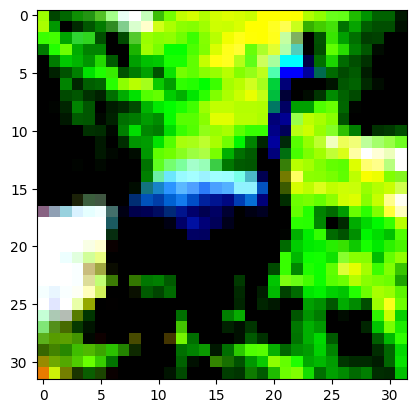

In [14]:
img, label = cifar2[0]
plt.imshow(img.permute(1,2,0))

In [16]:
img_batch = img.view(-1).unsqueeze(0)
img_batch

tensor([[ 0.6143, -0.3224, -0.1160,  ..., -1.2721, -1.3170, -1.0472]])

In [17]:
out = model(img_batch)
out

tensor([[0.5698, 0.4302]], grad_fn=<SoftmaxBackward0>)

In [18]:
x, index = torch.max(out, dim=1)
x, index

(tensor([0.5698], grad_fn=<MaxBackward0>), tensor([0]))

In [19]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss = nn.NLLLoss()

In [24]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label])), out, torch.tensor([label])

(tensor(0.9459, grad_fn=<NllLossBackward0>),
 tensor([[-0.4915, -0.9459]], grad_fn=<LogSoftmaxBackward0>),
 tensor([1]))

In [25]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss_fn = nn.NLLLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
nepochs = 100
for epoch in range(nepochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 4.229847
Epoch: 1, Loss: 8.514753
Epoch: 2, Loss: 6.849741
Epoch: 3, Loss: 3.004421
Epoch: 4, Loss: 4.790060
Epoch: 5, Loss: 10.699739
Epoch: 6, Loss: 11.799290


KeyboardInterrupt: 

In [27]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss_fn = nn.NLLLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
nepochs = 100
for epoch in range(nepochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.456481
Epoch: 1, Loss: 0.448324
Epoch: 2, Loss: 0.492816
Epoch: 3, Loss: 0.321953
Epoch: 4, Loss: 0.505076
Epoch: 5, Loss: 0.564649
Epoch: 6, Loss: 0.482930
Epoch: 7, Loss: 0.389924
Epoch: 8, Loss: 0.252070
Epoch: 9, Loss: 0.312482
Epoch: 10, Loss: 0.475218
Epoch: 11, Loss: 0.475093
Epoch: 12, Loss: 0.520573
Epoch: 13, Loss: 0.285073
Epoch: 14, Loss: 0.441852
Epoch: 15, Loss: 0.324260
Epoch: 16, Loss: 0.492554
Epoch: 17, Loss: 0.230984
Epoch: 18, Loss: 0.279488
Epoch: 19, Loss: 0.123343
Epoch: 20, Loss: 0.546846
Epoch: 21, Loss: 0.178506
Epoch: 22, Loss: 0.269364
Epoch: 23, Loss: 0.288709
Epoch: 24, Loss: 0.215588
Epoch: 25, Loss: 0.206620
Epoch: 26, Loss: 0.389222
Epoch: 27, Loss: 0.439183
Epoch: 28, Loss: 0.292090
Epoch: 29, Loss: 0.225943
Epoch: 30, Loss: 0.159017
Epoch: 31, Loss: 0.092098
Epoch: 32, Loss: 0.131248
Epoch: 33, Loss: 0.106684
Epoch: 34, Loss: 0.100086
Epoch: 35, Loss: 0.260190
Epoch: 36, Loss: 0.261751
Epoch: 37, Loss: 0.235911
Epoch: 38, Loss: 0.078

In [38]:
def val_accuracy(model, val_data):
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.shape[0]
            correct += int((predicted == labels).sum())
    return correct, total, correct/total

In [39]:
val_accuracy(model, cifar2_val)

(1648, 2000, 0.824)

In [40]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
nepochs = 100
for epoch in range(nepochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.546623
Epoch: 1, Loss: 0.498213
Epoch: 2, Loss: 0.388706
Epoch: 3, Loss: 0.576895
Epoch: 4, Loss: 0.607720
Epoch: 5, Loss: 0.436053
Epoch: 6, Loss: 0.536922
Epoch: 7, Loss: 0.235378
Epoch: 8, Loss: 0.260750
Epoch: 9, Loss: 0.395100
Epoch: 10, Loss: 0.458166
Epoch: 11, Loss: 0.564754
Epoch: 12, Loss: 0.181500
Epoch: 13, Loss: 0.307222
Epoch: 14, Loss: 0.388113
Epoch: 15, Loss: 0.460591
Epoch: 16, Loss: 0.251521
Epoch: 17, Loss: 0.453215
Epoch: 18, Loss: 0.592898
Epoch: 19, Loss: 0.271337
Epoch: 20, Loss: 0.131965
Epoch: 21, Loss: 0.221421
Epoch: 22, Loss: 0.388170
Epoch: 23, Loss: 0.127567
Epoch: 24, Loss: 0.301121
Epoch: 25, Loss: 0.452082
Epoch: 26, Loss: 0.203730
Epoch: 27, Loss: 0.147208
Epoch: 28, Loss: 0.313141
Epoch: 29, Loss: 0.123112
Epoch: 30, Loss: 0.161990
Epoch: 31, Loss: 0.269510
Epoch: 32, Loss: 0.183254
Epoch: 33, Loss: 0.089950
Epoch: 34, Loss: 0.106788
Epoch: 35, Loss: 0.195552
Epoch: 36, Loss: 0.112606
Epoch: 37, Loss: 0.153883
Epoch: 38, Loss: 0.073

In [41]:
val_accuracy(model, cifar2_val)

(1615, 2000, 0.8075)

In [42]:
val_accuracy(model, cifar2)

(10000, 10000, 1.0)